In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [17]:
df= pd.read_csv("C:\\Users\\USER DK\\OneDrive\\Documents\\insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [18]:
print("\nMissing values:", df.isnull().sum().values.sum())
#Memeriksa apakah ada data yang hilang dalam keseluruhan dataset dan berapa jumlah totalnya.
print("\nUnique values: \n", df.nunique())
#Memeriksa keragaman data dalam kolom.
#Kolom dengan sedikit nilai unik kemungkinan besar adalah variabel kategorikal (contoh: 'sex', 'region'), 
#sementara kolom dengan banyak nilai unik cenderung numerik atau kontinu (contoh: 'age', 'charges').


Missing values: 0

Unique values: 
 age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [20]:
df['sex']=df['sex'].astype('category')
df['smoker']=df['smoker'].astype('category')
df['region']=df['region'].astype('category')
df.info()
#mengubah tipe data menjadi kategori supaya menghemat memori dan meningkatkan kecepatan komputasi

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   charges   1338 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 46.3 KB


In [21]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [22]:
#siapa penerima benefit terbanyak?
#apakah perokok dominan?
#wilayah mana yang memiliki claim tertinggi?
df.describe(include='category')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


*Pria memiliki jumlah klaim yang lebih banyak (676) dibandingkan wanita (662)
*Jumlah perokok (274) lebih sedikit dibandingkan non-perokok (1064)
*Pada wilayah tenggara klaim yang terjadi lebih banyak dibandingkan wilayah lainnya (364)

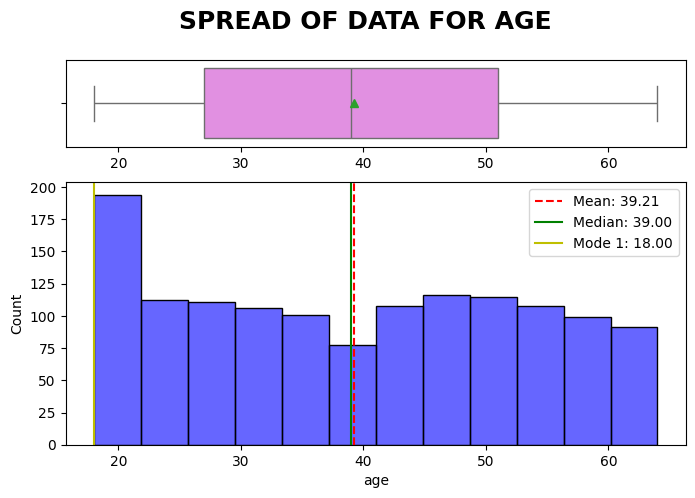

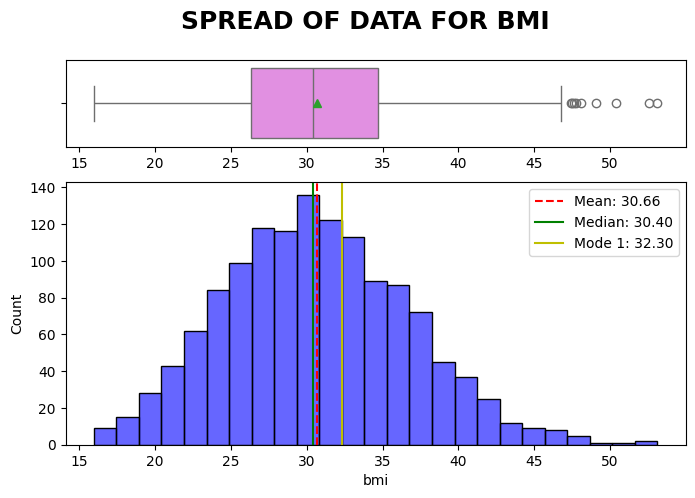

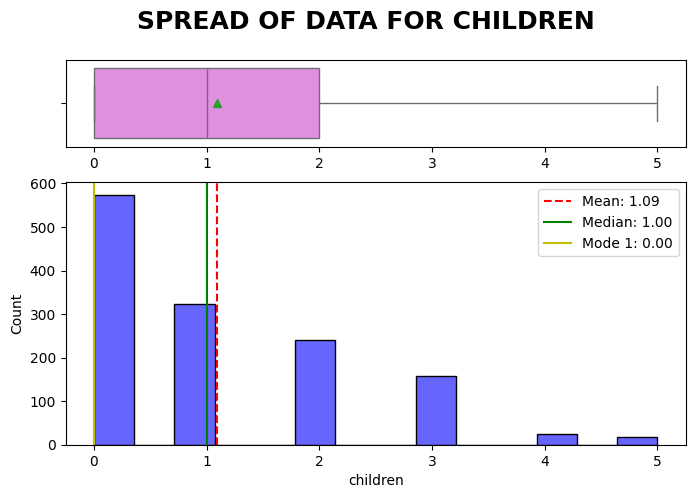

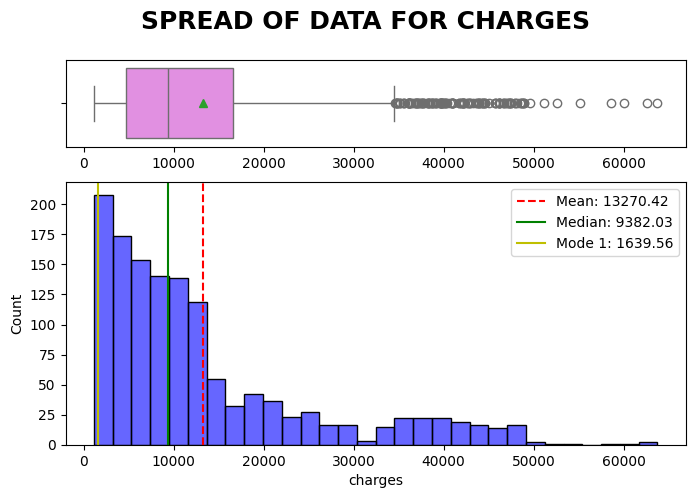

In [23]:
def dist_box_improved(data):
    Name = data.name.upper()
    # Membuat figure dan axes
    fig, (ax_box, ax_hist) = plt.subplots(2, 1,
                                         gridspec_kw={"height_ratios": (.25, .75)},
                                         figsize=(8, 5))
    fig.suptitle("SPREAD OF DATA FOR " + Name, fontsize=18, fontweight='bold')

    # --- Plot Atas: Boxplot ---
    sns.boxplot(x=data, showmeans=True, orient='h', color="violet", ax=ax_box)
    ax_box.set(xlabel='')

    # --- Plot Bawah: Histogram ---
    # Menggunakan histplot() yang lebih modern
    sns.histplot(data, color='blue', ax=ax_hist, alpha=0.6) # alpha untuk transparansi

    # Menghitung statistik
    mean_val = data.mean()
    median_val = data.median()
    # Plot semua modus yang ditemukan, bukan hanya yang pertama
    modes = data.mode()

    # Menggambar garis vertikal dengan label
    ax_hist.axvline(mean_val, color='r', linestyle='--', label=f'Mean: {mean_val:.2f}')
    ax_hist.axvline(median_val, color='g', linestyle='-', label=f'Median: {median_val:.2f}')
    for i, mode_val in enumerate(modes):
        ax_hist.axvline(mode_val, color='y', linestyle='-', label=f'Mode {i+1}: {mode_val:.2f}')

    # Menampilkan legenda berdasarkan label yang sudah kita definisikan
    ax_hist.legend()

# --- Loop yang lebih "Pythonic" ---
numerical_cols = df.select_dtypes(include=np.number).columns

for col in numerical_cols:
    dist_box_improved(df[col])
    plt.show() # Menampilkan plot satu per satu

*usia penerima benefit diantara 18-64. Dimana usia rata-rata nya adalah 39 dan kebanyakan konsumer di rentang usia 18-20

*Rata-rata BMI penerima benefit adalah 30.66 dan banyak outlier pada batas atas

*Kebanyakan penerima beneifet tidak memiliki anak

*Rata-rata biaya yang dikeluarkan asuransi adalah 13,270.42 dengan biaya tertingginya adalah 63,770.428

Kolom yang akan divisualisasikan: ['sex', 'smoker', 'region', 'children']


C:\Users\USER DK\AppData\Local\Temp\ipykernel_14636\3965666675.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.countplot(x=col_name, data=df, order=order, palette='viridis')


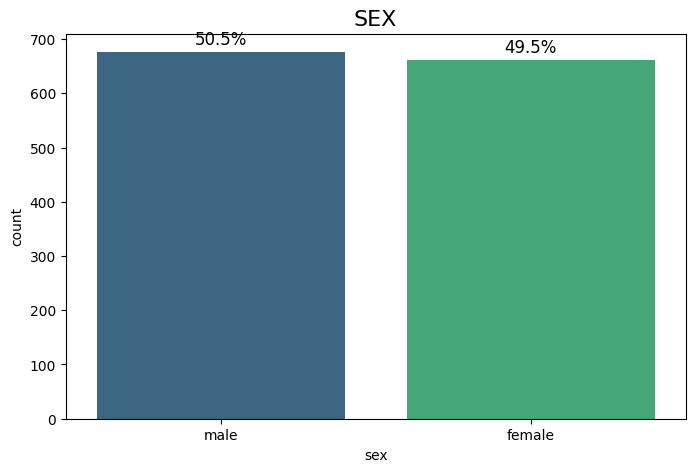

C:\Users\USER DK\AppData\Local\Temp\ipykernel_14636\3965666675.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.countplot(x=col_name, data=df, order=order, palette='viridis')


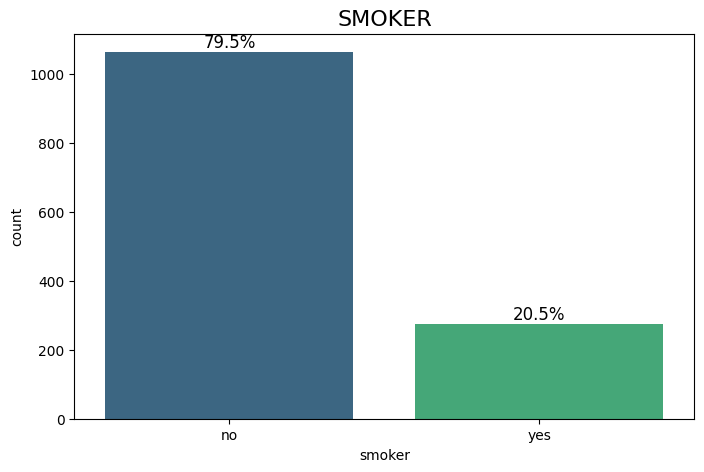

C:\Users\USER DK\AppData\Local\Temp\ipykernel_14636\3965666675.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.countplot(x=col_name, data=df, order=order, palette='viridis')


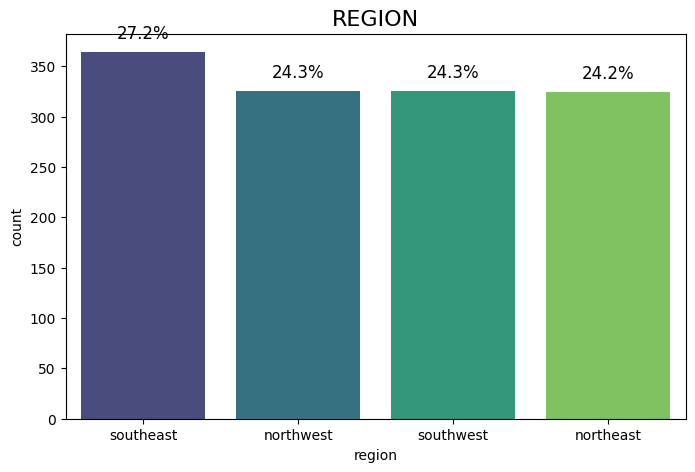

C:\Users\USER DK\AppData\Local\Temp\ipykernel_14636\3965666675.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.countplot(x=col_name, data=df, order=order, palette='viridis')


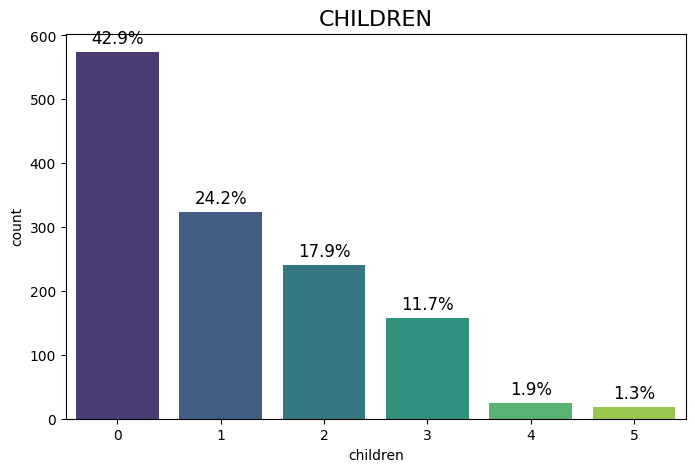

In [24]:
#Daftar gabungan dari semua kolom 
categorical_cols = df.select_dtypes(['category']).columns.tolist()
cols_to_plot = categorical_cols + ['children'] # Gabungkan list kategori dengan kolom 'children'

print(f"Kolom yang akan divisualisasikan: {cols_to_plot}")


#Satu loop untuk memproses semua kolom dalam daftar gabungan
for col_name in cols_to_plot:
    #Canva baru untuk setiap plot
    plt.figure(figsize=(8, 5))
    
    #Urutkan bar dari yang tertinggi ke terendah
    order = df[col_name].value_counts().index
    
    #Membuat plot countplot dengan urutan yang sudah ditentukan
    plot = sns.countplot(x=col_name, data=df, order=order, palette='viridis')
    plot.set_title(f"{col_name.upper()}", fontsize=16)

    # Menambahkan label sumbu persentase
    total = len(df[col_name])
    for p in plot.patches:
        percentage = f'{100 * p.get_height() / total:.1f}%'
        x = p.get_x() + p.get_width() / 2
        y = p.get_y() + p.get_height() + 0.01 * total
        plot.annotate(percentage, (x, y), ha='center', size=12)

    plt.show()

*50.5% penerima benefit laki-laki dan 49.5% adalah perempuan. Jumlah penerima benefit laki-laki dan perempuan kurang lebih sama
*20.5% penerima benefit adalah perokok
*Penerima benefit kebanyakan dari wilayah tenggara (27.2%) dibanding wilayah lainnya yang relatif hampir sama (~24%)

*hampir setengah (42.9%) penerima benefit tidak memiliki anak

C:\Users\USER DK\AppData\Local\Temp\ipykernel_14636\3405156251.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  plot = sns.barplot(x=kolom, y='charges', data=df, palette='mako', ci=None)
C:\Users\USER DK\AppData\Local\Temp\ipykernel_14636\3405156251.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.barplot(x=kolom, y='charges', data=df, palette='mako', ci=None)


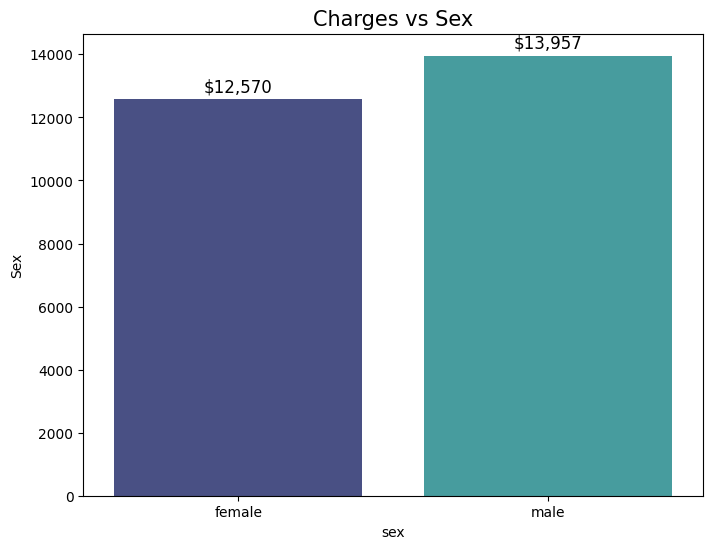

C:\Users\USER DK\AppData\Local\Temp\ipykernel_14636\3405156251.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  plot = sns.barplot(x=kolom, y='charges', data=df, palette='mako', ci=None)
C:\Users\USER DK\AppData\Local\Temp\ipykernel_14636\3405156251.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.barplot(x=kolom, y='charges', data=df, palette='mako', ci=None)


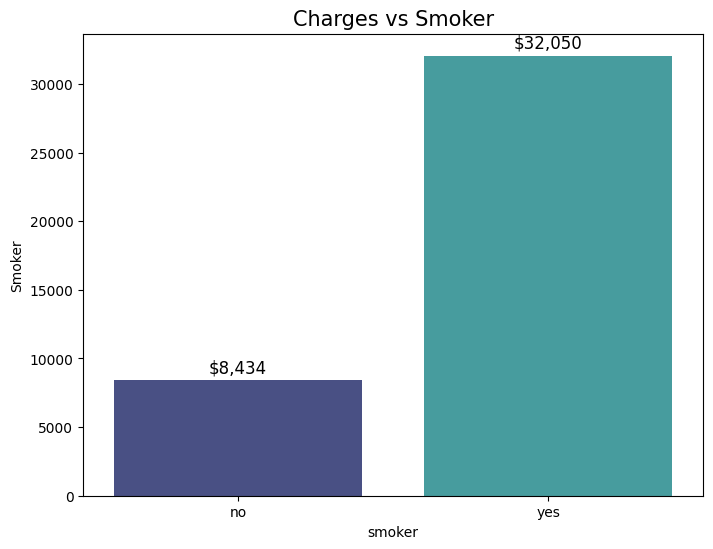

C:\Users\USER DK\AppData\Local\Temp\ipykernel_14636\3405156251.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  plot = sns.barplot(x=kolom, y='charges', data=df, palette='mako', ci=None)
C:\Users\USER DK\AppData\Local\Temp\ipykernel_14636\3405156251.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.barplot(x=kolom, y='charges', data=df, palette='mako', ci=None)


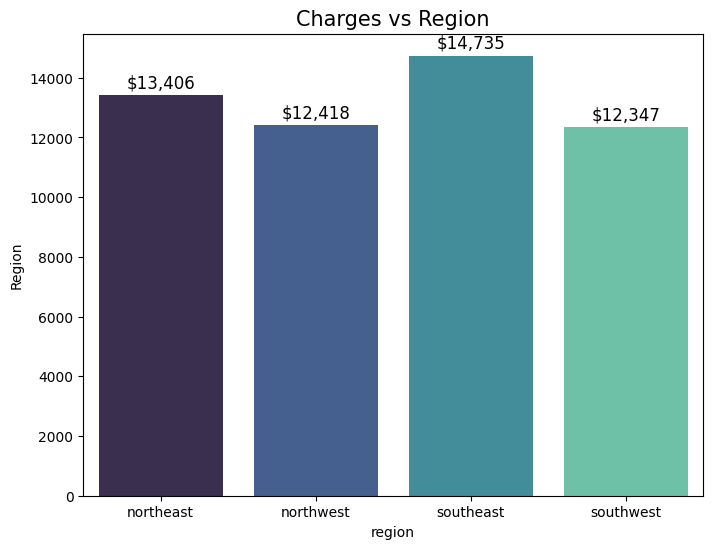

In [25]:
kolom_analisis = ['sex', 'smoker', 'region']

#loop untuk setiap kolom
for kolom in kolom_analisis:

    #canvas baru untuk setiap plot
    plt.figure(figsize=(8, 6))
    plot = sns.barplot(x=kolom, y='charges', data=df, palette='mako', ci=None)

    # Tambahkan judul dan label sumbu
    plt.title(f'Charges vs {kolom.title()}', fontsize=15)
    plt.ylabel(kolom.title())

    # Tambahkan label nilai di atas setiap bar
    for p in plot.patches:
        height = p.get_height()
        plot.annotate(f'${height:,.0f}',
                      (p.get_x() + p.get_width() / 2, height),
                      ha='center', va='center',
                      xytext=(0, 9),
                      textcoords='offset points',
                      size=12)
    plt.show()

*rata-rata biaya berdasarkan kelamin tidak terlalu signifikat, dimana pria (13,957) dan wanita (12,570)

*Status perokok memiliki rata-rata biaya yang cukup tinggi (32,050) dibandingkan status non-perokok (8,434). Hal ini agak berlawanan dengan jumlah perokok yang minim yaitu 274 (20.5%) dari total sampel.

*rata-rata biaya yang dikeluarkan setiap wilayah hampir sama dengan jangkauan yang dimulai dari 12,347 (Barat daya) hingga 14,735 (Tenggara)

C:\Users\USER DK\AppData\Local\Temp\ipykernel_14636\1936394739.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  sns.lineplot(x="age", y="charges", data=df, ci=0)


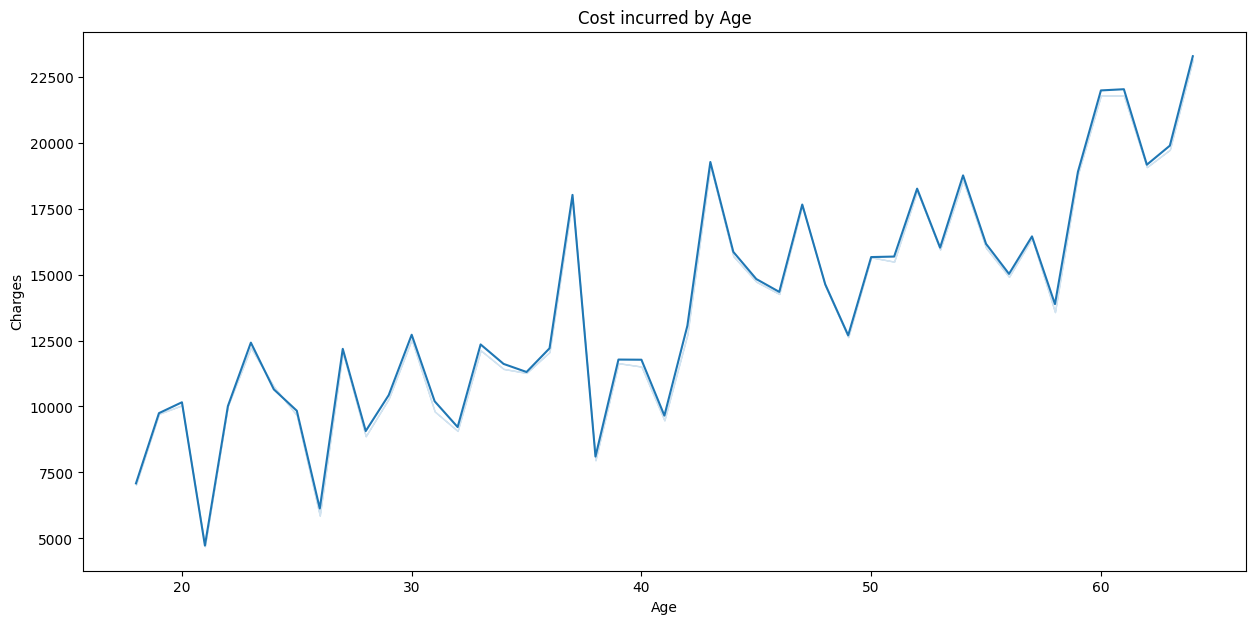

In [26]:
plt.figure(figsize=(15,7))
sns.lineplot(x="age", y="charges", data=df, ci=0)
plt.title('Cost incurred by Age')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

Diagram menunjukkan peningkatan umur seseorang berbanding lurus dengan peningkatan biaya yang dikeluarkan

In [27]:
def condition (ideal_bmi):

    #menghitung BMI ideal
    if ideal_bmi < 18.5:
        return "Underweight"
    elif 18.5 <= ideal_bmi <= 24.9:
        return "ideal"
    elif 25 <= ideal_bmi <= 29.9:
        return "Overweight"
    else:
        return "Obesity"

In [28]:
df['column_bmi'] = df['bmi'].apply(condition)
df.head()

,age,sex,bmi,children,smoker,region,charges,column_bmi
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight
1,18,male,33.770,1,no,southeast,1725.55230,Obesity
2,28,male,33.000,3,no,southeast,4449.46200,Obesity
3,33,male,22.705,0,no,northwest,21984.47061,ideal
4,32,male,28.880,0,no,northwest,3866.85520,Overweight


C:\Users\USER DK\AppData\Local\Temp\ipykernel_14636\464920337.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  plot = sns.barplot(x=df.column_bmi, y=df.charges, data=df, palette='mako', ci=None)
C:\Users\USER DK\AppData\Local\Temp\ipykernel_14636\464920337.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.barplot(x=df.column_bmi, y=df.charges, data=df, palette='mako', ci=None)


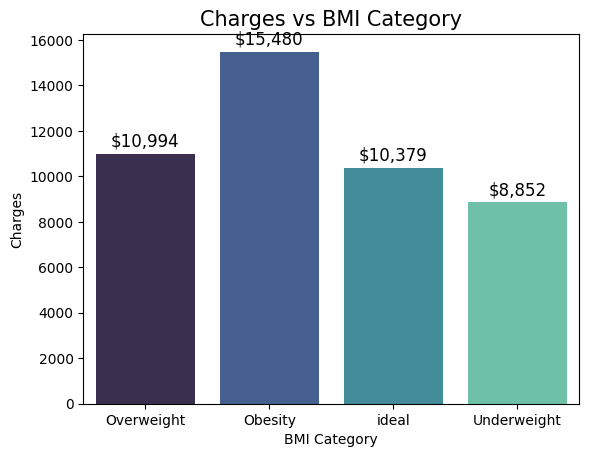

In [29]:
plot = sns.barplot(x=df.column_bmi, y=df.charges, data=df, palette='mako', ci=None)

plot.set_title('Charges vs BMI Category', fontsize=15)
plot.set_xlabel('BMI Category')
plot.set_ylabel('Charges')

for p in plot.patches:
    height = p.get_height()
    plot.annotate(f'${height:,.0f}',
                  (p.get_x() + p.get_width() / 2, height),
                  ha='center', va='center',
                  xytext=(0, 9),
                  textcoords='offset points',
                  size=12)
plt.show()

Seseorang dengan golongan obesitas memilki biaya yang cukup tinggi dibandingkan yang lain (15,480).


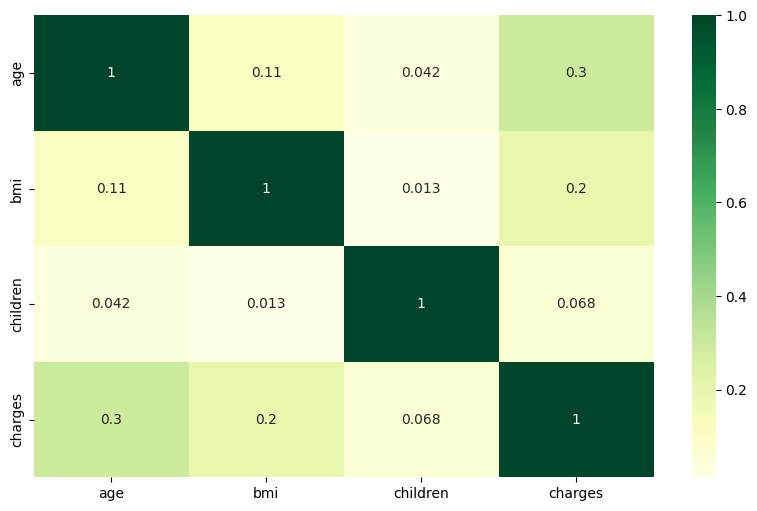

In [30]:
plt.figure(figsize=(10, 6))
numeric_df =df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap='YlGn')
plt.show()

*Kore